In [1]:
import cv2
import pandas as pd
import numpy as np

n_of_mixture = 4

img1 = cv2.imread("./hw4/soccer1.jpg")
img1_df = pd.DataFrame(img1.reshape(-1,3),columns=["r","g","b"])
img1_mask = cv2.imread("./hw4/soccer1_mask.png")
mask_df = pd.DataFrame(img1_mask.reshape(-1,3),columns=["r","g","b"])
#print(mask_df)
#mask_df.to_csv("mask.csv")


In [2]:

s = pd.Series(np.zeros(len(img1_df.index)))
s
img1_df["isGround"] = np.zeros(len(img1_df.index))
img1_df = img1_df.astype({"isGround":int})
for i in range(len(img1_df.index)):
    if mask_df.at[i,"r"] == 0:
        img1_df.at[i,"isGround"] = 0
    else:
        img1_df.at[i,"isGround"] = 1
img1_df

,r,g,b,isGround
0,147,118,113,0
1,151,129,123,0
2,134,125,115,0
3,147,144,130,0
4,193,185,172,0
...,...,...,...,...
89995,60,122,100,1
89996,60,122,100,1
89997,60,122,100,1
89998,60,122,100,1


In [3]:
import random

def img_out(result:np.ndarray, original_img:np.ndarray, filename:str):
    n = n_of_mixture - 1
    img_out = original_img.copy()
    most = np.argmax(np.bincount(result))
    second_most = np.argmax(np.bincount(result[result!=most]))
    color = [
        [255,0,0],
        [0,255,0],
        [0,0,255],
        [255,255,0],
        [255,0,255],
        [0,255,255]
    ]
    color[most] = [255,255,255]
    color[second_most] = [0,0,0]
    for row in range(img_out.shape[0]):
        for col in range(img_out.shape[1]):
            i = result[row*img_out.shape[1] + col]
            img_out[row][col] = color[i]

    cv2.imwrite(filename, img_out)

def result_reverse(result:np.ndarray):
    for i in range(len(result)):
        if result[i] == 0:
            result[i] = 1
        else:
            result[i] = 0

def choose_background(result:np.ndarray ,n = 1):
    bg = np.zeros(len(result),dtype="int32")
    most = -1
    t = result.copy()
    for tt in range(n):
        most = np.argmax(np.bincount(t))
        t = t[t!=most]
        for i in range(len(result)):
            if result[i] == most:
                bg[i] = 1
    return bg

In [17]:
from sklearn.mixture import GaussianMixture as GMM
import matplotlib.pyplot as plt


X = img1_df[["r","g","b"]]
Y = img1_df["isGround"]

M1 = GMM(n_components=n_of_mixture)
M1.fit(X)
result = M1.predict(X)
img1_df["predict"] = result
#result = choose_background(result,2)
img_out(result, img1, "output1.jpg")

        

<img src="output1.jpg">

/tmp/ipykernel_20214/1098020126.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


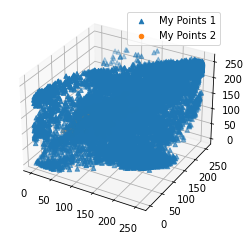

In [18]:

fig = plt.figure()
ax = fig.gca(projection='3d')
img1_df.to_csv("result.csv")
ax.scatter(img1_df.loc[img1_df["isGround"] == 0, "r"], img1_df.loc[img1_df["isGround"] == 0, "g"], img1_df.loc[img1_df["isGround"] == 0,"b"], cmap='Reds', marker='^', label='My Points 1')
ax.scatter(img1_df.loc[img1_df["isGround"] == 1, "r"], img1_df.loc[img1_df["isGround"] == 1, "g"], img1_df.loc[img1_df["isGround"] == 1,"b"], cmap='Blues', marker='o', label='My Points 2')
# 顯示圖例
ax.legend()

# 顯示圖形
plt.show()

0.9717444444444444


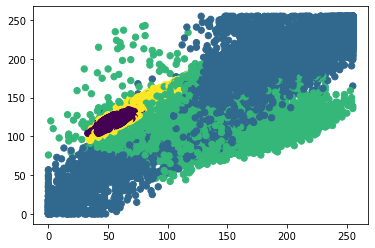

In [19]:
from sklearn.metrics import accuracy_score 
'''
for i in range(result.size):
    if result[i] == 1:
        result[i] = 0
    else:
        result[i] = 1
'''
    

p2 = plt.scatter(X.loc[:, "r"], X.loc[:, "g"], c=result, s=40, cmap='viridis')

result =  choose_background(result,2)

print(accuracy_score(Y,result))

In [20]:
img2 = cv2.imread("./hw4/soccer2.jpg")
img2_df = pd.DataFrame(img2.reshape(-1,3),columns=["r","g","b"])


In [21]:
img2_mask = cv2.imread("./hw4/soccer2_mask.png")
mask2_df = pd.DataFrame(img2_mask.reshape(-1,3),columns=["r","g","b"])
img2_df["isGround"] = np.zeros(len(img2_df.index))
img2_df = img2_df.astype({"isGround":int})
for i in range(len(img2_df.index)):
    if mask2_df.at[i,"r"] == 0:
        img2_df.at[i,"isGround"] = 0
    else:
        img2_df.at[i,"isGround"] = 1
        
img2_df.to_csv("2.csv")


In [22]:


X2 = img2_df[["r","g","b"]]
Y2 = img2_df["isGround"]
print(len(X2.index))
result2 = M1.predict(X2)


86800


In [23]:

img_out(result2, img2, "output2.jpg")
result2 = choose_background(result2,1)
print(accuracy_score(Y2,result2))

0.8205990783410139


In [26]:
X3 = pd.concat([X,X2], axis=0)
Y3 = pd.concat([Y,Y2], axis=0)

M2 = GMM(n_components=n_of_mixture)
M2.fit(X3)

result3_1 = M2.predict(X)
result3_2 = M2.predict(X2)


In [30]:
result_reverse(result3_1)
result_reverse(result3_2)

print(len(result3_1)) 
print(len(result3_2))

img_out(result3_1,img1,"output3_1.jpg")
img_out(result3_2,img2,"output3_2.jpg")

result3_11 = choose_background(result3_1)
result3_22 = choose_background(result3_2,1)

print(accuracy_score(Y,result3_11))
print(accuracy_score(Y2,result3_22))

90000
86800
0.8352666666666667
0.2122926267281106
